In [3]:
%pip install tensorflow

import tensorflow as tf
import numpy as np
import plotly.graph_objects as go
import random

from tensorflow import keras
from itertools import product
from plotly.subplots import make_subplots

Note: you may need to restart the kernel to use updated packages.


# 13회차 과제
목표: 딥 러닝 모델을 통해 손 글씨 분류하기.  
(수업 자료의 `과제 연계 실습` 참고)

다음은 0에서 9를 적은 손 글씨 데이터셋이다.  
은닉층이 하나 이상 존재하는 적절한 분류모델을 제작하고, 90% 이상의 정확도를 달성하시오.

X_train.shape: (60000, 28, 28); y_train.shape: (60000,)
X_test.shape: (10000, 28, 28); y_train.shape: (10000,)


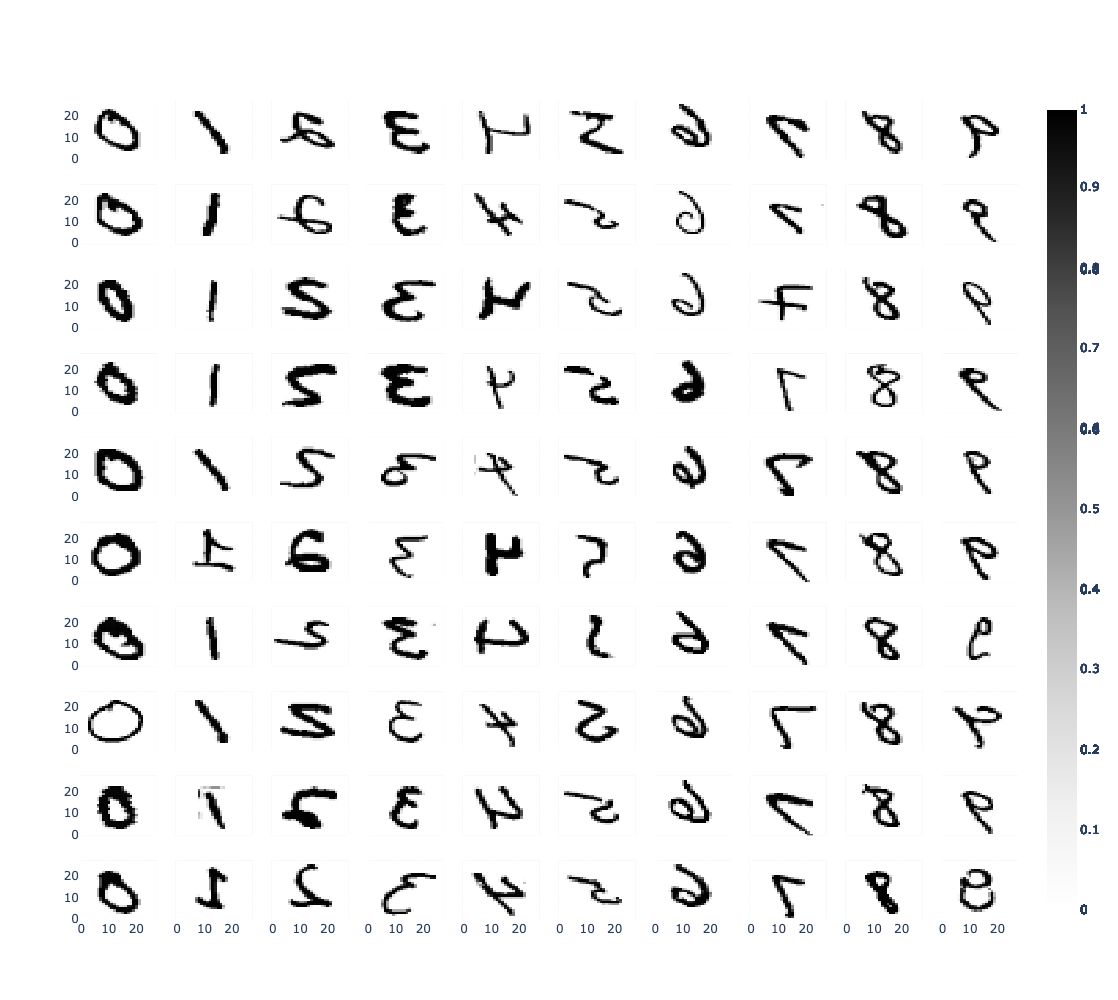

(60000, 784)
(10000, 784)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8953 - loss: 0.3545
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9724 - loss: 0.0911
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0553
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9875 - loss: 0.0385
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.9887 - loss: 0.0318
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.9920 - loss: 0.0241
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.9925 - loss: 0.0218
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9922 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.9941 - loss: 0.0178
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9949 - loss: 0.0147
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9745 - loss: 0.1216


[0.10761027783155441, 0.9771999716758728]

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 

print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}; y_train.shape: {y_test.shape}')

fig = make_subplots(
    rows=10, cols=10, shared_xaxes=True, shared_yaxes=True,
    
)

for i, j in product(range(0, 10), range(0, 10)):
    x = X_train[y_train == i, :, :][j, :, :]
    fig.add_trace(
        go.Heatmap(z=np.flip(x), colorscale='greys'),
        row=(j + 1), col=(i + 1)
    )

fig.update_layout(
    width=1000,
    height=1000
)

fig.show()

X_train_1D, X_test_1D = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

print(X_train_1D.shape)
print(X_test_1D.shape)

model = keras.models.Sequential()
model.add(
    keras.layers.InputLayer(
        name='input',
        shape = (784, ), 
        
    )
)
model.add(
    keras.layers.Dense(
        name = 'hidden1',
        units = 300, 
        activation=keras.activations.relu 
    )
)

model.add(
    keras.layers.Dense(
        name = 'hidden2',
        units = 100, 
        activation=keras.activations.relu 
    )
)
model.add(
    keras.layers.Dense(
        name = 'output',
        units = 10, 
        activation=keras.activations.softmax 
    )
)

model.summary()

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train_1D, y=y_train, batch_size=32, epochs=10)

model.evaluate(x=X_test_1D, y=y_test)